A notebook for the VM-IAP project's data visualisation. Also a good place to store all the citations I'm going to need to use in my project report: pyfaidx, bedtools, pybedtools. 

Initially, just looking at any data relationships between variable methylation and GC content.

In [66]:
%matplotlib inline

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import pybedtools
from pyfaidx import Fasta
from Bio import SeqIO
from Bio.SeqUtils import GC
mpl.rcParams['figure.dpi']= 100

mm_fasta = pybedtools.BedTool('data/GRCm38.p6.genome.fa')
iap = pybedtools.BedTool('data/clean.mm10.IAP.mended.extent.bed')

filt_high = iap.filter(lambda x: len(x) > 700)
filt_low = iap.filter(lambda x: len(x) <= 700)

print(iap.count())

rng_high = pybedtools.BedTool()
rng_high = rng_high.random(l=5000, n=iap.count(), genome='mm10')

rng_low = pybedtools.BedTool()
rng_low = rng_low.random(l=500, n=iap.count(), genome='mm10')

iap = iap.sequence(fi=mm_fasta)
solo_iap = filt_low.sequence(fi=mm_fasta)
int_iap = filt_high.sequence(fi=mm_fasta)

10633


In [67]:
iap_gc = [GC(rec.seq) for rec in SeqIO.parse(iap.seqfn, "fasta")]
solo_gc = [GC(rec.seq) for rec in SeqIO.parse(solo_iap.seqfn, "fasta")]
int_gc = [GC(rec.seq) for rec in SeqIO.parse(int_iap.seqfn, "fasta")]

iap_len = [len(rec) for rec in SeqIO.parse(iap.seqfn, "fasta")]
solo_len = [len(rec) for rec in SeqIO.parse(solo_iap.seqfn, "fasta")]
int_len = [len(rec) for rec in SeqIO.parse(int_iap.seqfn, "fasta")]

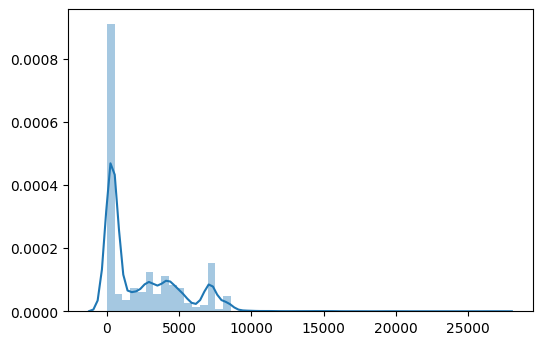

In [68]:
sns.distplot(iap_len)

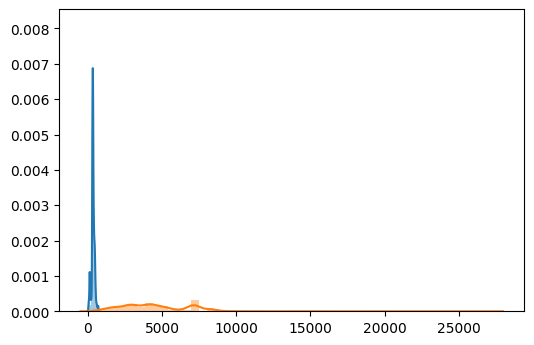

In [69]:
sns.distplot(solo_len)
sns.distplot(int_len)

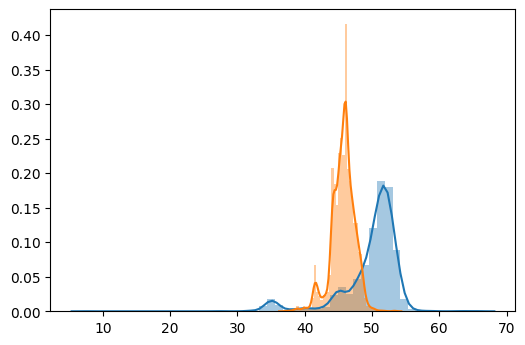

In [70]:
sns.distplot(solo_gc)
sns.distplot(int_gc)